## Setup

In [1]:
# Install necessary libraries
!pip install nltk spacy
!python -m nltk.downloader all
!python -m spacy download en_core_web_sm

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping


In [2]:
import nltk
import spacy

# Load the downloaded language model
nlp = spacy.load("en_core_web_sm")

## Part 1: Text Cleaning

In [3]:
import re

# Sample text
sample_text = """
Dr. John Smith, a renowned physicist from MIT, gave a lecture on quantum computing in Toronto on June 5th, 2023.
Over 500 people attended the event, which was covered by major news outlets like CNN and BBC.
"""

# Convert to lowercase
cleaned_text = sample_text.lower()

# Remove punctuation
cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)

# Remove digits
cleaned_text = re.sub(r'\d+', '', cleaned_text)

# Remove extra whitespace
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

print("Cleaned Text:\n", cleaned_text)

Cleaned Text:
 dr john smith a renowned physicist from mit gave a lecture on quantum computing in toronto on june th over people attended the event which was covered by major news outlets like cnn and bbc


## Part 2: Tokenization

In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy

# Sentence Tokenization
sentences = sent_tokenize(cleaned_text)
print("Sentences:", sentences)

# Word Tokenization (NLTK)
word_tokens_nltk = word_tokenize(cleaned_text)
print("\nWord Tokens (NLTK):", word_tokens_nltk)

# Word Tokenization (spaCy)
nlp = spacy.load("en_core_web_sm")
doc = nlp(cleaned_text)
word_tokens_spacy = [token.text for token in doc]
print("\nWord Tokens (spaCy):", word_tokens_spacy)

Sentences: ['dr john smith a renowned physicist from mit gave a lecture on quantum computing in toronto on june th over people attended the event which was covered by major news outlets like cnn and bbc']

Word Tokens (NLTK): ['dr', 'john', 'smith', 'a', 'renowned', 'physicist', 'from', 'mit', 'gave', 'a', 'lecture', 'on', 'quantum', 'computing', 'in', 'toronto', 'on', 'june', 'th', 'over', 'people', 'attended', 'the', 'event', 'which', 'was', 'covered', 'by', 'major', 'news', 'outlets', 'like', 'cnn', 'and', 'bbc']

Word Tokens (spaCy): ['dr', 'john', 'smith', 'a', 'renowned', 'physicist', 'from', 'mit', 'gave', 'a', 'lecture', 'on', 'quantum', 'computing', 'in', 'toronto', 'on', 'june', 'th', 'over', 'people', 'attended', 'the', 'event', 'which', 'was', 'covered', 'by', 'major', 'news', 'outlets', 'like', 'cnn', 'and', 'bbc']


## Part 3: Stopword Removal

In [5]:
from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
filtered_tokens = [word for word in word_tokens_nltk if word.lower() not in stop_words]

# Compare before and after
print("Before:", len(word_tokens_nltk), "words")
print("After:", len(filtered_tokens), "words")
print("\nFiltered Tokens:\n", filtered_tokens)

Before: 35 words
After: 23 words

Filtered Tokens:
 ['dr', 'john', 'smith', 'renowned', 'physicist', 'mit', 'gave', 'lecture', 'quantum', 'computing', 'toronto', 'june', 'th', 'people', 'attended', 'event', 'covered', 'major', 'news', 'outlets', 'like', 'cnn', 'bbc']


# Part 4: Stemming and Lemmatization

In [6]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sample_words = ['running', 'flies', 'better', 'swimming', 'faster', 'talked', 'bigger', 'easily', 'caring', 'studies']

print(f"{'Word':<12}{'Stemmed':<12}{'Lemmatized':<12}")
for word in sample_words:
    stemmed = stemmer.stem(word)
    lemmatized = lemmatizer.lemmatize(word)
    print(f"{word:<12}{stemmed:<12}{lemmatized:<12}")


Word        Stemmed     Lemmatized  
running     run         running     
flies       fli         fly         
better      better      better      
swimming    swim        swimming    
faster      faster      faster      
talked      talk        talked      
bigger      bigger      bigger      
easily      easili      easily      
caring      care        caring      
studies     studi       study       


Discussion:

Stemming cuts off word endings roughly.

Lemmatization gives proper root words (e.g., "better" → "good") and respects grammar.

Prefer lemmatization when accuracy and context matter (e.g., search engines, chatbots).

##Part 5: POS Tagging

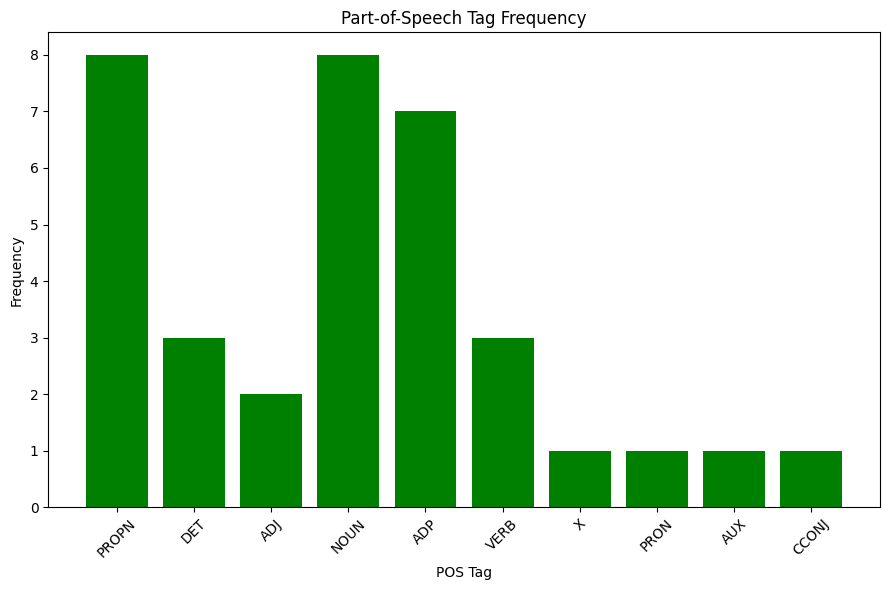

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# POS tagging using spaCy
pos_tags = [token.pos_ for token in doc]

# Count frequency
pos_counts = Counter(pos_tags)

# Plot
plt.figure(figsize=(9, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='green')
plt.title('Part-of-Speech Tag Frequency')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 6: Named Entity Recognition (NER)

Named Entities:
 [('dr john smith', 'PERSON'), ('toronto', 'GPE'), ('june', 'DATE'), ('cnn', 'ORG'), ('bbc', 'ORG')]


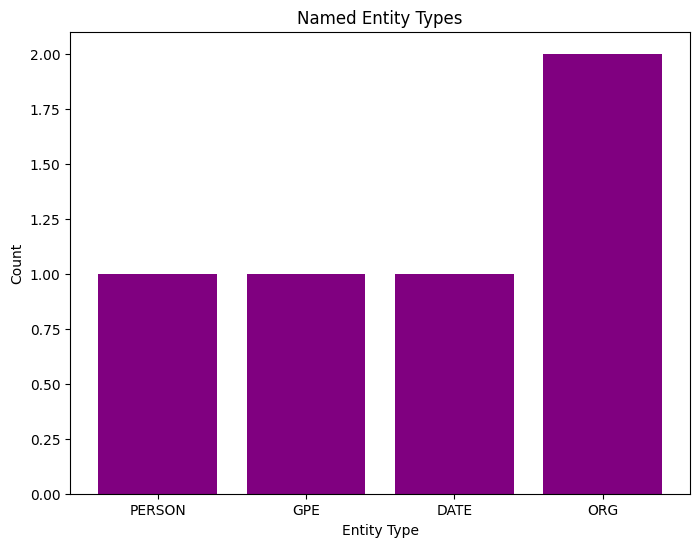

In [8]:
from spacy import displacy

# Named Entities
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Named Entities:\n", entities)

# Count by type
entity_counts = Counter([ent.label_ for ent in doc.ents])

# Visualize named entities
displacy.render(doc, style="ent", jupyter=True)

# Bar plot of entity types
plt.figure(figsize=(8, 6))
plt.bar(entity_counts.keys(), entity_counts.values(), color='purple')
plt.title('Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.show()
